## Cluster similar Houses

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Load the data
df = pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt", index_col=0)
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [13]:
#Find the shape of the Data
print("SHAPE: ",df.shape)

print('*******************************')

# Checking for any missing values
print(df.isnull().any())

SHAPE:  (645, 7)
*******************************
Sqft           False
Floor          False
TotalFloor     False
Bedroom        False
Living.Room    False
Bathroom       False
Price          False
dtype: bool


In [14]:
# Data cleaning & getting rid of irrelevant information before clustering 
from sklearn.preprocessing import  MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
print(pd.DataFrame(df_scaled))


            0         1         2         3     4    5         6
0    0.148867  0.047619  0.162162  0.166667  0.50  0.4  0.229192
1    0.322977  0.190476  0.162162  0.500000  0.50  0.4  0.294793
2    0.141748  0.190476  0.162162  0.166667  0.50  0.2  0.212792
3    0.200000  0.047619  0.162162  0.333333  0.50  0.4  0.159492
4    0.110680  0.476190  0.351351  0.333333  0.50  0.4  0.159492
..        ...       ...       ...       ...   ...  ...       ...
640  0.181877  0.285714  0.378378  0.333333  0.50  0.4  0.159492
641  0.003236  0.142857  0.243243  0.000000  0.25  0.2  0.076671
642  0.069256  0.571429  0.351351  0.000000  0.25  0.2  0.159492
643  0.245307  0.095238  0.351351  0.333333  0.50  0.4  0.241492
644  0.185113  0.238095  0.162162  0.333333  0.50  0.2  0.122591

[645 rows x 7 columns]


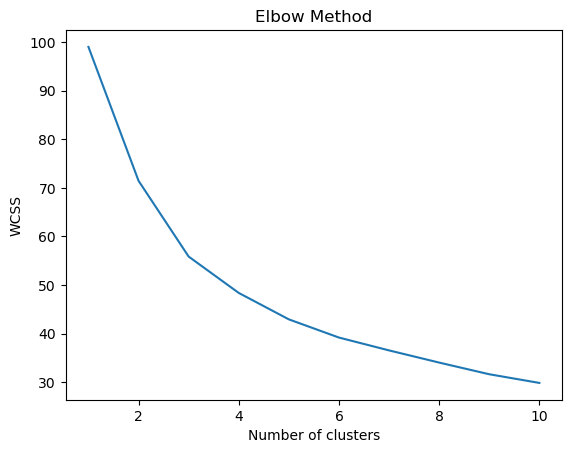

In [15]:
# Finding the optimal value of k
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [19]:
# Storing cluster to which the house belongs along with the data
# As the Optimal K from the above chart is 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df_scaled)

df['Cluster'] = kmeans.labels_
print(df.head())
print("*"*90)
print(df.groupby('Cluster').mean())


       Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  Price  Cluster
1  1177.698      2           7        2            2         2  62000        2
2  2134.800      5           7        4            2         2  78000        2
3  1138.560      5           7        2            2         1  58000        1
4  1458.780      2           7        3            2         2  45000        2
5   967.776     11          14        3            2         2  45000        2
******************************************************************************************
                Sqft     Floor  TotalFloor   Bedroom  Living.Room  Bathroom  \
Cluster                                                                       
0        2514.386952  9.879032   16.064516  3.516129     2.048387  2.451613   
1         812.732283  6.211957   10.141304  1.668478     1.369565  1.048913   
2        1554.930463  4.341246    9.329377  3.225519     1.970326  1.991098   

                 Price  
Cluster       